# Thesis revisions
Last used: 23.04.15  
Last modified: 23.04.15  

**This notebook serves to organize analyses for thesis revisions; these analyses don't fit neatly into the chapter-specific notebooks.**

In [44]:
import os, pdb
import scipy.stats as ss
import scipy.odr.odrpack as odrpack
from scipy.stats.mstats import gmean
from scipy.stats import ks_2samp, kstest, linregress
import itertools
import autoreload
from IPython.core.display import display, HTML, Image

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.backends.backend_pdf as pltSave
from matplotlib.ticker import FuncFormatter

import helper_fcns as hf
import plot_sf_figs as psf
import numpy as np
import pandas as pd

from helper_fcns_sfBB import compute_f1f0 as bb_compute_f1f0
from helper_fcns_sfBB import get_resp_str

import warnings
warnings.filterwarnings(action='once')


base_dir = os.getcwd() + '/';

# what's the save name for this analysis?
saveName = 'figures/reports/ch00_thesis_revisions/'; # for one save name for all figures
save_loc = base_dir + saveName;

In [40]:
from matplotlib import rcParams

tex_width = 469; # per \layout in Overleaf on document
sns_offset = 2;

rcParams.update(mpl.rcParamsDefault)

fontsz = 12;
tick_scalar = 1.5;

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

params = {'text.usetex' : False,
          'font.size' : fontsz,
          'font.family': 'lmodern',
           'font.style': 'italic'}
plt.rcParams.update(params)

rcParams['lines.markeredgewidth'] = 0; # no edge, since weird tings happen then

tick_adj = ['xtick.major.size', 'xtick.minor.size', 'ytick.major.size', 'ytick.minor.size']
for adj in tick_adj:
    rcParams[adj] = rcParams[adj] * tick_scalar;

In [46]:
%matplotlib inline

## Table of contents
- Contrast, normalization, and d-DoG-S explanations: simple plots used in public talk
- Stimulus size in the experiments

### Simple functions

In [41]:
def inv_sig(x):
    return -np.log((1-x)/x);

## Contrast, normalization, and d-DoG-S explanations
This was used for the public talk of the defense, and should be here rather than in a chapter-specific notebook

*First plot: Luminance vs. dva; vary the additive term in the plotting line and change the save name to demonstrate varied phase*

findfont: Font family ['lmodern'] not found. Falling back to DejaVu Sans.


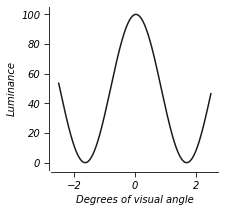

In [47]:
plt.figure(figsize=(3, 3))
plt.xlabel('Degrees of visual angle')
plt.ylabel('Luminance')

sf1 = .3
sf2 = 1
sf3 = 3
mean_lum = 50

xvals = np.linspace(-2.5, 2.5, 500)
plt.plot(xvals, mean_lum + mean_lum*np.sin(2*np.pi*xvals*sf1 + 1.5), color='k')
sns.despine(offset=sns_offset)

saveName = "/000_sfExpl_ph3.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

*Vary the lines of this cell to demonstrate varying SF and/or contrast*

In [43]:
plt.figure(figsize=(3, 3))
plt.xlabel('Degrees of visual angle')
plt.ylabel('Luminance')

sf1 = .3
sf2 = 1
sf3 = 3
mean_lum = 50

xvals = np.linspace(-2.5, 2.5, 500)
plt.plot(xvals, mean_lum + mean_lum*np.sin(2*np.pi*xvals*sf1), color='k', alpha=0.3)
# plt.plot(xvals, mean_lum + mean_lum*np.sin(2*np.pi*xvals*sf2), color='k', alpha=0.3)
# plt.plot(xvals, mean_lum + mean_lum*np.sin(2*np.pi*xvals*sf3), color='k')
plt.plot(xvals, mean_lum + .33*mean_lum*np.sin(2*np.pi*xvals*sf1), color='k')
sns.despine(offset=sns_offset)

saveName = "/000_sfExpl.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

*This plot demonstrates spatial frequency tuning with and without gain control*

In [ ]:
gain_control_on = 0 # or off [0]

plt.figure(figsize=(3, 3))
plt.xlabel('Spatial frequency (c/deg)')
plt.ylabel('Response (a.u.)')

sf_vals = np.geomspace(0.3, 10, 100)
resp = hf.get_descrResp([10, 0.1, 0.7, 3], sf_vals, DoGmodel=1)
resp /= np.max(resp)
resp = np.square(resp)

plt.semilogx(sf_vals, np.minimum(thresh, thresh*resp), color='k')
if gain_control_on:
    thresh = 0.5
    pw = 0.33

    plt.semilogx(sf_vals, np.minimum(thresh, np.power(0.66, pw)*thresh*resp), color='k', alpha=0.66)
    plt.semilogx(sf_vals, np.minimum(thresh, np.power(0.5, pw)*thresh*resp), color='k', alpha=0.5)
    plt.semilogx(sf_vals, np.minimum(thresh, np.power(0.33, pw)*thresh*resp), color='k', alpha=0.33)
    plt.semilogx(sf_vals, np.minimum(thresh, np.power(0.1, pw)*thresh*resp), color='k', alpha=0.1)
else:
    thresh = 0.5
    to_sub = 0.2 * np.max(resp)

    plt.semilogx(sf_vals, np.maximum(0, 0.66*resp - to_sub), color='k', alpha=0.66)
    plt.semilogx(sf_vals, np.maximum(0, 0.5*resp - to_sub), color='k', alpha=0.5)
    plt.semilogx(sf_vals, np.maximum(0, 0.33*resp - to_sub), color='k', alpha=0.33)
    plt.semilogx(sf_vals, np.maximum(0, 0.1*resp - to_sub), color='k', alpha=0.1)

sns.despine(offset=sns_offset)

saveName = "/0000_gainControl_%s.pdf" % ("on" if gain_control_on else "off")
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

*This plot shows the sharpening of SF tuning via the d-DoG-S model*

In [ ]:
normed = True;


f, ax = plt.subplots(1, 2, figsize=(10, 5))

ref_params_dog1 = [100, 0.1, inv_sig(0.7), 2];
ref_params_dog2 = [inv_sig(0.95), 2, inv_sig(0.7), 2]; # the center params (first two) are relative to dog1
ref_params_sep = [-np.inf, 0];

ref_params_all = np.hstack((ref_params_dog1, ref_params_dog2, ref_params_sep))
ref_params_dog1_only = np.hstack((ref_params_dog1, [-np.inf,1,0,0], ref_params_sep))
ref_params_dog2_only = np.hstack((np.hstack((ref_params_dog1[0]*hf.sigmoid(ref_params_dog2[0]), 
                                             ref_params_dog1[1]*ref_params_dog2[1],
                                             ref_params_dog2[2:], [-np.inf,1,0,0])), ref_params_sep))
# sf values
vals = np.geomspace(0.1, 8, 100);

del_linewidth = True;

# SPACE
space, samps, dc, df1, df2 = hf.parker_hawken(np.copy(ref_params_all), inSpace=True,
                                              debug=True, isMult=True, ref_params=None);

ax[0].plot(samps, space, 'k-')#, label='full');                                                                                                                                                                                                                                                                                           
# and plot the constitutent parts                                                                                                                                                                                                                                                                                                                               
ax[0].plot(samps, dc, 'k--')#, label='center');                                                                                                                                                                                                                                                                                           
# ax[0].plot(samps, df1, 'r--')#, label='f1');                                                                                                                                                                                                                                                                                              
ax[0].plot(samps, df2, 'k:')#, label='f2');  
ax[0].set_xlabel('Degrees of visual angle')
ax[0].set_ylabel('Sensitivity (a.u.)')


# FOURIER
prms_norm = np.copy(ref_params_all);
prms_norm[-1] = np.Inf; # biggest response when spacing is max
to_norm = np.nanmax(hf.parker_hawken(prms_norm, stim_sf=vals)) if normed else 1

ax[1].plot(vals, hf.parker_hawken(ref_params_all, stim_sf=vals)/to_norm, 'k-')
ax[1].plot(vals, hf.parker_hawken(ref_params_dog1_only, stim_sf=vals)/to_norm, 'k--')
ax[1].plot(vals, hf.parker_hawken(ref_params_dog2_only, stim_sf=vals)/to_norm, 'k:')
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].axis('equal')
ax[1].set_ylim([0.01, 1])

ax[1].set_xlabel('Spatial frequency (c/deg)')
ax[1].set_ylabel('Response (a.u.)')

from matplotlib.ticker import FuncFormatter
for i in range(2):
    for jj, axis in enumerate([ax[i].xaxis, ax[i].yaxis]):
        axis.set_major_formatter(FuncFormatter(lambda x,y: '%d' % x if x>=1 else '%.1f' % x)) # this will make everything in non-scientific notation!                                                                                                                                                                                                                     
        if jj==1: # i.e. y axis, make sure we have tick labels, here, too                                                                                                                                                                                                                                                                                                 
            axis.set_tick_params(labelleft=True);


sns.despine(offset=5)
f.tight_layout()

saveName = "/0000_ddogs.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

## Stimulus size used

Per Hawk's comments, the text wasn't clear enough as to what stimulus size was used for the experiments. Here, I'll plot the distribution of stimulus sizes used in the experiments, split by LGN/V1 data.

*Note that we know Sach's experiments (34 LGN cells) used 8 degree patches for all cells.*

In [48]:
# Load jointLists
lgn_jointList = hf.np_smart_load('jointList_LGN_230121_vT00_dvT00_jt7.npy')
v1_jointList = hf.np_smart_load('jointList_wMods_V1_230121vE_vT00_dvT00_m3j10.npy')

# --- also add a better access to expDir to lgn, v1_jointList
nCells_lgn = len(lgn_jointList.keys())
lgn_expDirs = [lgn_jointList[x]["metadata"]["fullPath"].split('/')[-3] for x in range(nCells_lgn)]
nCells_v1 = len(v1_jointList.keys())
v1_expDirs = [v1_jointList[x]["metadata"]["fullPath"].split('/')[-3] for x in range(nCells_v1)]

##### LGN

In [88]:
stimSize_lgn = np.nan * np.zeros((nCells_lgn,))

for cell_i, expDir in enumerate(lgn_expDirs):
    if expDir == "sach":
        stimSize_lgn[cell_i] = 8
    else:
        # load current cell
        curr_meta = lgn_jointList[cell_i]["metadata"]
        curr_cell = hf.np_smart_load(os.path.join(expDir, "structures", f"{curr_meta['expName']}_sfm.npy"))
        stimSize_lgn[cell_i] = curr_cell["sfm"]["exp"]["size"]
        
stimSize_noSach = np.round(stimSize_lgn[stimSize!=8], 1) # only Sach will be exactly 8 (as int, not float)
# Now after this, round to nearest tenth...
stimSize_lgn = np.round(stimSize_lgn, 1)

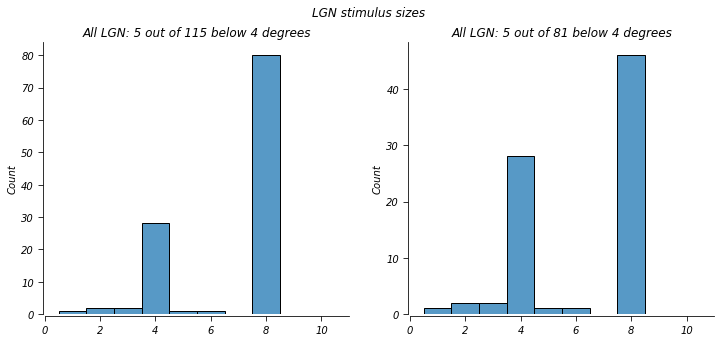

In [91]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
thresh = 4 # want to know how many cells below this size

# All data
ax[0].set_title(f"All LGN: {np.sum(stimSize_lgn<thresh)} out of {len(stimSize_lgn)} below {thresh} degrees")
sns.histplot(np.round(stimSize_lgn, 3), bins=np.linspace(0.5, 10.5, 11), ax=ax[0])
# No Sach
ax[1].set_title(f"All LGN: {np.sum(stimSize_noSach<thresh)} out of {len(stimSize_noSach)} below {thresh} degrees")
sns.histplot(np.round(stimSize_noSach, 3), bins=np.linspace(0.5, 10.5, 11), ax=ax[1])

f.suptitle("LGN stimulus sizes")

sns.despine(offset=sns_offset)

saveName = "/01_stimSize_lgn.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()

##### V1

In [104]:
stimSize_v1 = np.nan * np.zeros((nCells_v1,))

for cell_i, expDir in enumerate(v1_expDirs):
    suffix = "sfBB" if expDir=="V1_BB" else "sfm"
    # load current cell
    curr_meta = v1_jointList[cell_i]["metadata"]
    curr_cell = hf.np_smart_load(os.path.join(expDir, "structures", f"{curr_meta['expName']}_{suffix}.npy"))
    if expDir == "V1_BB":
        stimSize_v1[cell_i] = np.unique(curr_cell["sfBB_core"]["trial"]["size"])
    else:
        stimSize_v1[cell_i] = curr_cell["sfm"]["exp"]["size"]


In [ ]:
sns.histplot(stimSize_v1)

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
thresh = 4 # want to know how many cells below this size

# All data
ax[0].set_title(f"All LGN: {np.sum(stimSize_lgn<thresh)} out of {len(stimSize_lgn)} below {thresh} degrees")
sns.histplot(np.round(stimSize_lgn, 3), bins=np.linspace(0.5, 10.5, 11), ax=ax[0])
# No Sach
ax[1].set_title(f"All LGN: {np.sum(stimSize_noSach<thresh)} out of {len(stimSize_noSach)} below {thresh} degrees")
sns.histplot(np.round(stimSize_noSach, 3), bins=np.linspace(0.5, 10.5, 11), ax=ax[1])

f.suptitle("LGN stimulus sizes")

sns.despine(offset=sns_offset)

saveName = "/01_stimSize_lgn.pdf"
if not os.path.exists(save_loc):
    os.makedirs(save_loc)
pdfSv = pltSave.PdfPages(save_loc + saveName);
pdfSv.savefig(plt.gcf(), bbox_inches='tight') # only one figure here...
pdfSv.close()